# **LoanTap Credit Risk Prediction**

### **Objective**

To build a predictive model that identifies **risky loan applicants** based on their historical and demographic data.
The goal is to assist LoanTap in making **data-driven lending decisions** and reduce financial losses caused by loan defaults.

### **Project Overview**

This project focuses on developing a **Credit Risk Prediction Model** that classifies borrowers into risky or non-risky categories. By using machine learning, the model helps the business minimize default rates while maintaining customer trust and operational efficiency.

#### **The workflow includes:**

- **Data Cleaning & Preprocessing:** Treated missing values, handled outliers, and encoded categorical variables.

- **Feature Engineering:** Created new ratio features to better capture the borrower’s repayment capacity and credit behavior

    - Loan-to-Income Ratio: Combines loan amount, annual income, installment, and interest rate to represent the overall financial burden of the loan on the borrower.

    - DTI-to-Revolving Balance Ratio: Measures the borrower’s debt-to-income ratio relative to their revolving balance and credit grade, highlighting how credit utilization interacts with borrower risk level.

   - These features aim to capture hidden interactions between financial variables that may influence credit risk..

- **Imbalance Treatment:** Applied **SMOTE (Synthetic Minority Oversampling Technique)** to balance the dataset and improve minority class prediction.

- **Model Development:** Started with **Logistic Regression** as a baseline and later implemented **LightGBM**, a gradient boosting model optimized for accuracy and speed.

- **Model Evaluation:** Compared models using **Accuracy, Precision, Recall, F1-Score, and ROC-AUC**, with a stronger focus on recall to capture more potential defaulters.



### **Key Outcome:**

The final **LightGBM model** achieved approximately **70% ROC-AUC score** and **85% recall** for the risky class — a significant improvement over the baseline logistic regression model.

This project demonstrates strong skills in **data preprocessing, feature engineering, model selection, imbalance handling, and business-oriented evaluation,** making it a realistic application of machine learning in credit risk management.

## **Dataset understanding**

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
data=pd.read_csv(r"D:\Loan Tap\Loan_Tap.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [170]:
df=data.copy()

In [171]:
df.shape

(396030, 27)

In [172]:
df.duplicated().sum()

np.int64(0)

In [173]:
df=df.drop(['title','address'],axis=1)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  dti                   396030 non-null  float64
 15  

#### **Categorical feature distribution**

In [175]:
df['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [176]:
df['home_ownership'].value_counts(normalize=True)*100

home_ownership
MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: proportion, dtype: float64

In [177]:
df['verification_status'].value_counts(normalize=True)*100

verification_status
Verified           35.240512
Source Verified    33.175517
Not Verified       31.583971
Name: proportion, dtype: float64

In [178]:
df['loan_status'].value_counts(normalize=True)*100   ## my Target columns highly imbalance

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

In [179]:
df['purpose'].value_counts(normalize=True)*100   

purpose
debt_consolidation    59.214453
credit_card           20.962806
home_improvement       6.067722
other                  5.349342
major_purchase         2.219529
small_business         1.439537
car                    1.186021
medical                1.059516
moving                 0.720652
vacation               0.619145
house                  0.555766
wedding                0.457541
renewable_energy       0.083075
educational            0.064894
Name: proportion, dtype: float64

In [180]:
df['application_type'].value_counts(normalize=True)*100   

application_type
INDIVIDUAL    99.820468
JOINT          0.107315
DIRECT_PAY     0.072217
Name: proportion, dtype: float64

In [181]:
df['pub_rec_bankruptcies'].value_counts(normalize=True)*100   

pub_rec_bankruptcies
0.0    88.592776
1.0    10.819353
2.0     0.467010
3.0     0.088750
4.0     0.020734
5.0     0.008091
6.0     0.001770
7.0     0.001011
8.0     0.000506
Name: proportion, dtype: float64

In [182]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

<Axes: xlabel='count', ylabel='grade'>

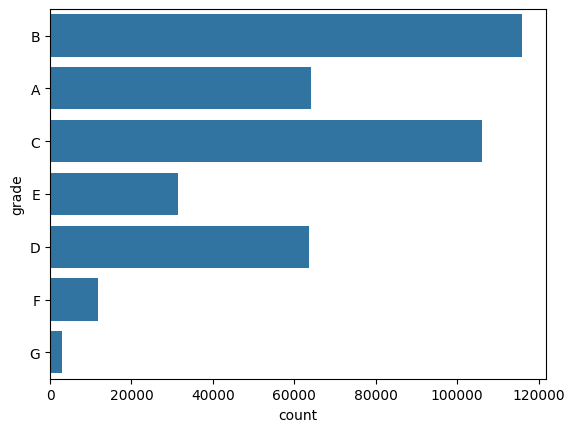

In [183]:
sns.countplot(df['grade'])

<Axes: xlabel='count', ylabel='emp_length'>

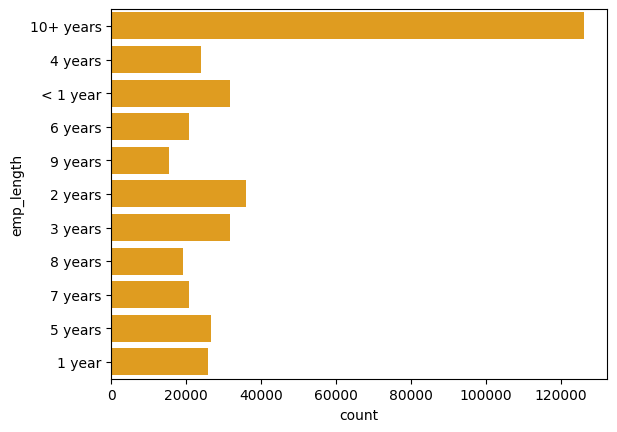

In [184]:
sns.countplot(df['emp_length'],color='orange')

#### **Numerical feature distribution**

Text(0, 0.5, ' ')

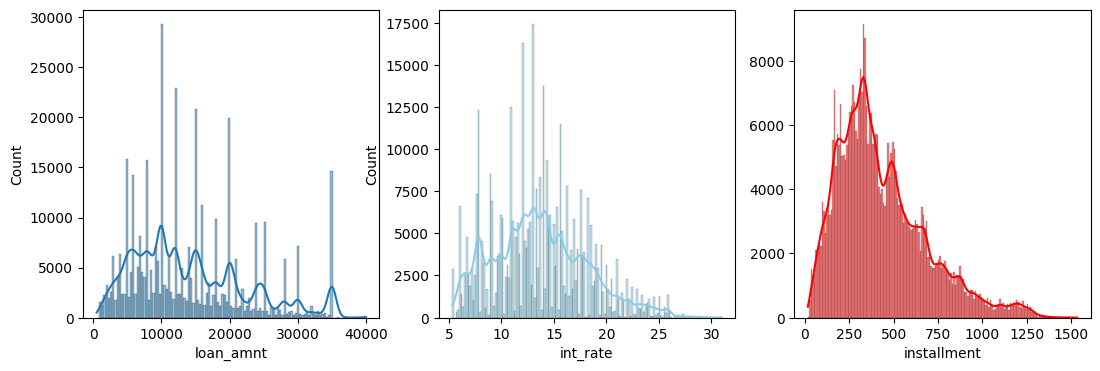

In [185]:
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
sns.histplot(data=df,x='loan_amnt',kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df,x='int_rate',kde=True,color='skyblue')
plt.subplot(1,3,3)
sns.histplot(data=df,x='installment',kde=True,color='red')
plt.ylabel(" ")


<Axes: xlabel='open_acc', ylabel='Count'>

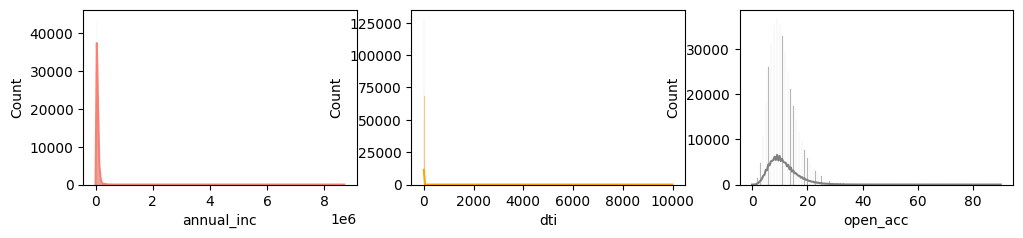

In [186]:
plt.figure(figsize=(12,5))
plt.subplot(2,3,1)
sns.histplot(data=df,x='annual_inc',kde=True,color='salmon')
plt.subplot(2,3,2)
sns.histplot(data=df,x='dti',kde=True,color='orange')
plt.subplot(2,3,3)
sns.histplot(data=df,x='open_acc',kde=True,color='grey')

<Axes: xlabel='pub_rec_bankruptcies', ylabel='Count'>

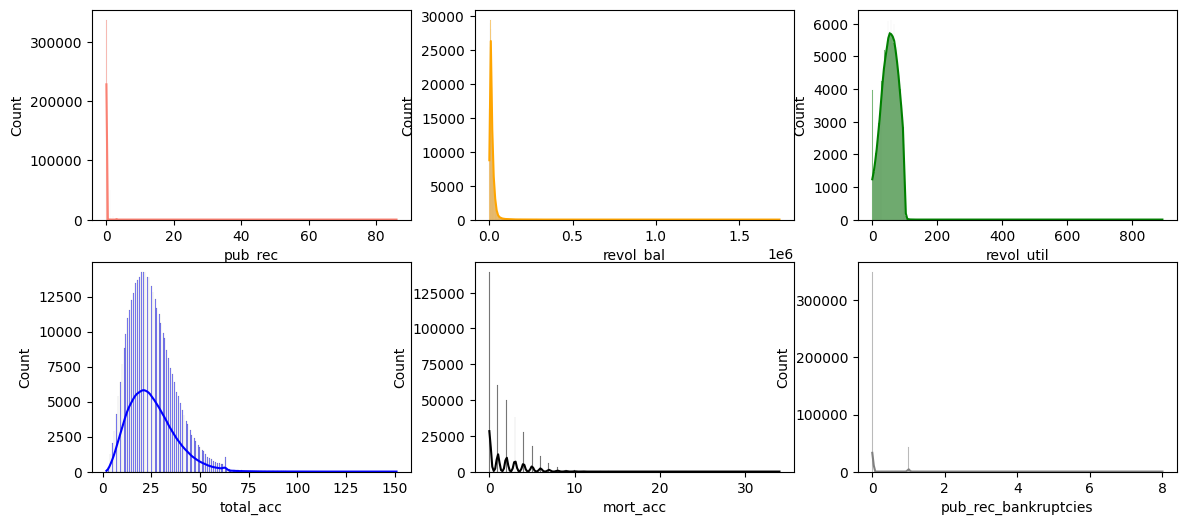

In [187]:
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
sns.histplot(data=df,x='pub_rec',kde=True,color='salmon')
plt.subplot(2,3,2)
sns.histplot(data=df,x='revol_bal',kde=True,color='orange')
plt.subplot(2,3,3)
sns.histplot(data=df,x='revol_util',kde=True,color='green')
plt.subplot(2,3,4)
sns.histplot(data=df,x='total_acc',kde=True,color='blue')
plt.subplot(2,3,5)
sns.histplot(data=df,x='mort_acc',kde=True,color='black')
plt.subplot(2,3,6)
sns.histplot(data=df,x='pub_rec_bankruptcies',kde=True,color='grey')

## **Missing value Handling**

In [188]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [189]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [190]:
df=df.drop(['emp_title'],axis=1)

In [191]:
df=df.dropna(subset=['revol_util'])

In [192]:
df=df.dropna(subset=['pub_rec_bankruptcies'])

In [193]:
df['emp_length']=df['emp_length'].fillna('10+ years')

In [194]:
df['emp_length'].value_counts(normalize=True)

emp_length
10+ years    0.364775
2 years      0.090433
3 years      0.079951
< 1 year     0.079865
5 years      0.066938
1 year       0.065242
4 years      0.060480
6 years      0.052637
7 years      0.052586
8 years      0.048406
9 years      0.038687
Name: proportion, dtype: float64

In [195]:
df['mort_acc'].value_counts(normalize=True).head(10)

mort_acc
0.0    0.390231
1.0    0.168664
2.0    0.139400
3.0    0.106203
4.0    0.077832
5.0    0.050786
6.0    0.030890
7.0    0.016899
8.0    0.008715
9.0    0.004617
Name: proportion, dtype: float64

In [196]:
df['mort_acc']=df['mort_acc'].fillna(df['mort_acc'].mode()[0])

In [197]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

## **Outliers Handling**

In [198]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [199]:
df=df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'purpose', 'dti','pub_rec','revol_bal','mort_acc',
       'pub_rec_bankruptcies','loan_status']]

In [200]:
df.select_dtypes(exclude='object').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec',
       'revol_bal', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

#### **Box plot of all numerical data**

<Axes: xlabel='mort_acc'>

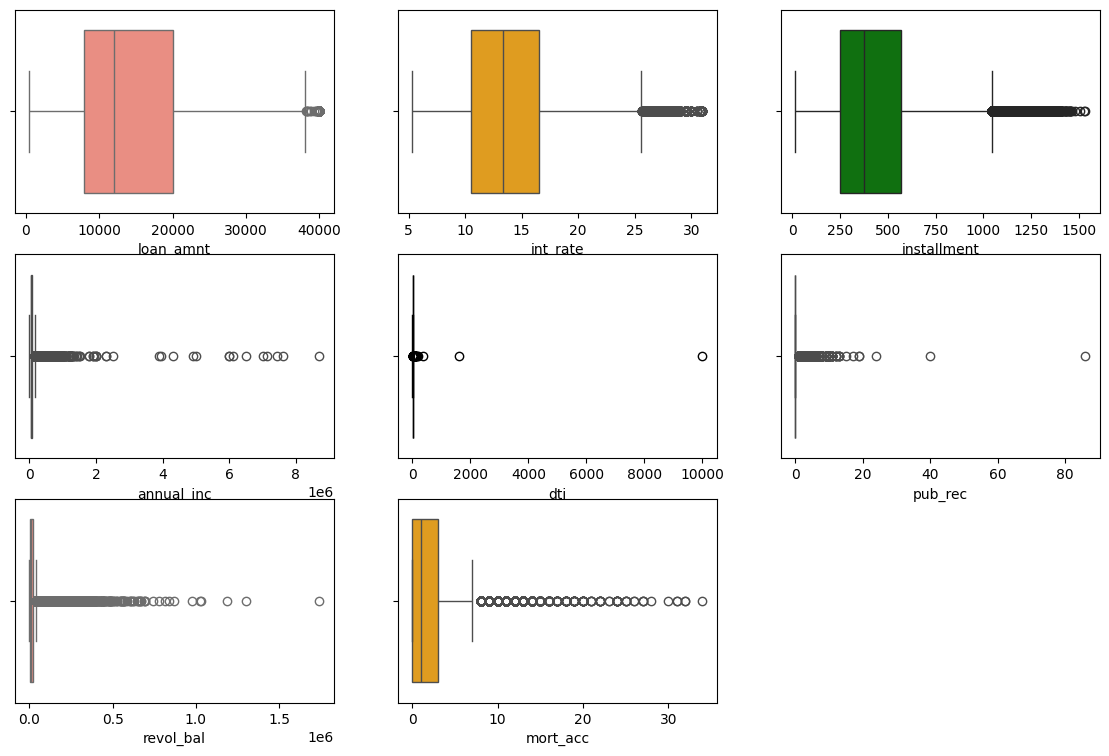

In [201]:
plt.figure(figsize=(14,9))
plt.subplot(3,3,1)
sns.boxplot(data=df,x='loan_amnt',color='salmon')
plt.subplot(3,3,2)
sns.boxplot(data=df,x='int_rate',color='orange')
plt.subplot(3,3,3)
sns.boxplot(data=df,x='installment',color='green')
plt.subplot(3,3,4)
sns.boxplot(data=df,x='annual_inc',color='blue')
plt.subplot(3,3,5)
sns.boxplot(data=df,x='dti',color='black')
plt.subplot(3,3,6)
sns.boxplot(data=df,x='pub_rec',color='grey')
plt.subplot(3,3,7)
sns.boxplot(data=df,x='revol_bal',color='salmon')
plt.subplot(3,3,8)
sns.boxplot(data=df,x='mort_acc',color='orange')


#### **Income outlier handling**

Axes(0.125,0.11;0.775x0.77)


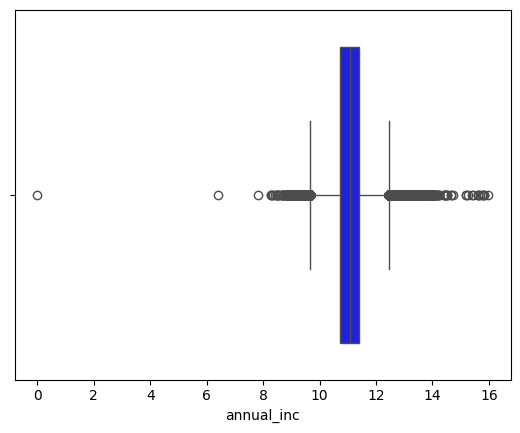

In [202]:
df['annual_inc']=np.log1p(df['annual_inc'])
print(sns.boxplot(data=df,x='annual_inc',color='blue'))

In [203]:
q1=df['annual_inc'].quantile(0.25)
q3=df['annual_inc'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['annual_inc']=np.clip(df['annual_inc'],ll,ul)

<Axes: xlabel='annual_inc'>

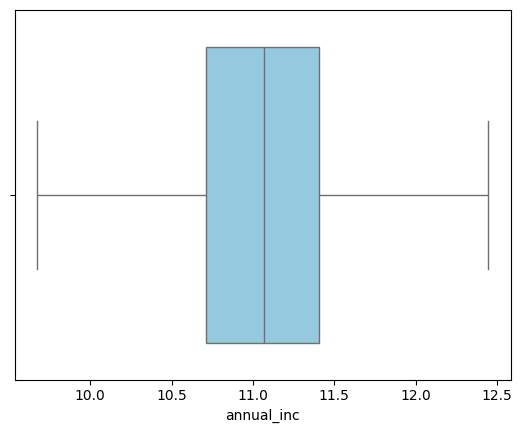

In [204]:
sns.boxplot(data=df,x='annual_inc',color='skyblue')

#### **pub_rec outlier handling**

Axes(0.125,0.11;0.775x0.77)


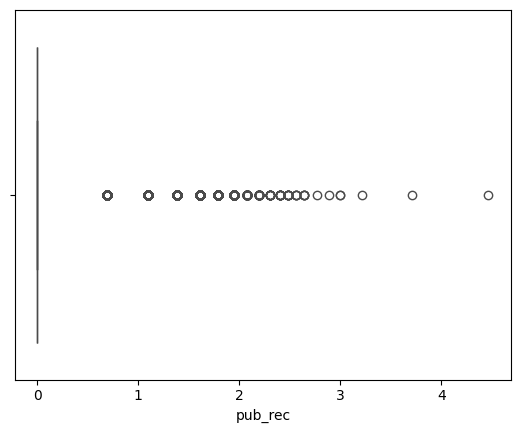

In [205]:
df['pub_rec']=np.log1p(df['pub_rec'])
print(sns.boxplot(data=df,x='pub_rec',color='steelblue'))

Axes(0.125,0.11;0.775x0.77)


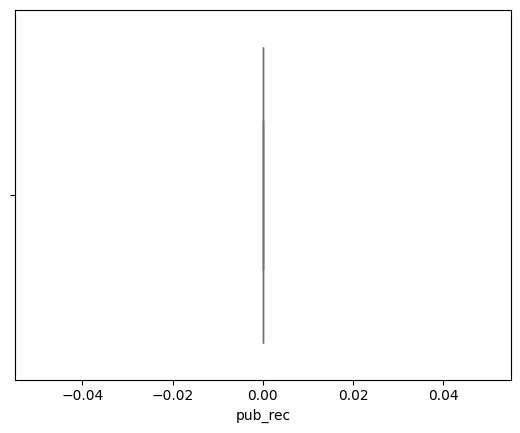

In [206]:
q1=df['pub_rec'].quantile(0.25)
q3=df['pub_rec'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['pub_rec']=np.clip(df['pub_rec'],ll,ul)
print(sns.boxplot(data=df,x='pub_rec',color='skyblue'))

#### **revol_bal outlier handling**

Axes(0.125,0.11;0.775x0.77)


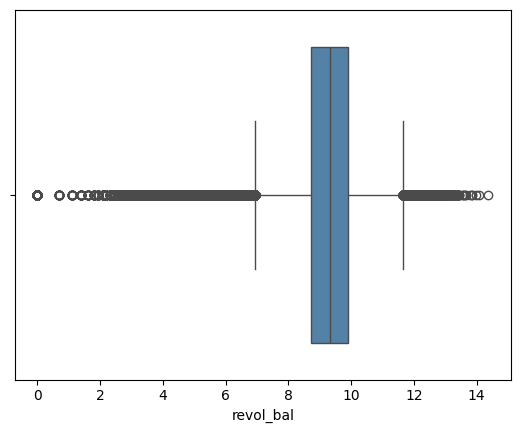

In [207]:
df['revol_bal']=np.log1p(df['revol_bal'])
print(sns.boxplot(data=df,x='revol_bal',color='steelblue'))

Axes(0.125,0.11;0.775x0.77)


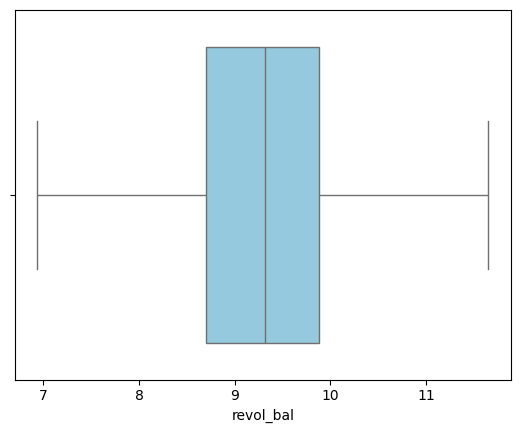

In [208]:
q1=df['revol_bal'].quantile(0.25)
q3=df['revol_bal'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['revol_bal']=np.clip(df['revol_bal'],ll,ul)
print(sns.boxplot(data=df,x='revol_bal',color='skyblue'))

#### dti

In [209]:
df['dti'].skew()

np.float64(430.9573955622961)

Axes(0.125,0.11;0.775x0.77)


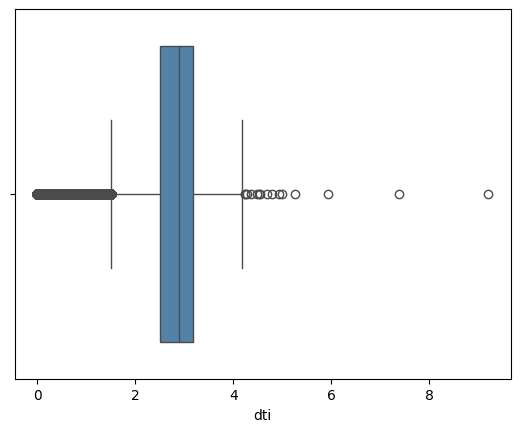

In [210]:
df['dti']=np.log1p(df['dti'])
print(sns.boxplot(data=df,x='dti',color='steelblue'))

Axes(0.125,0.11;0.775x0.77)


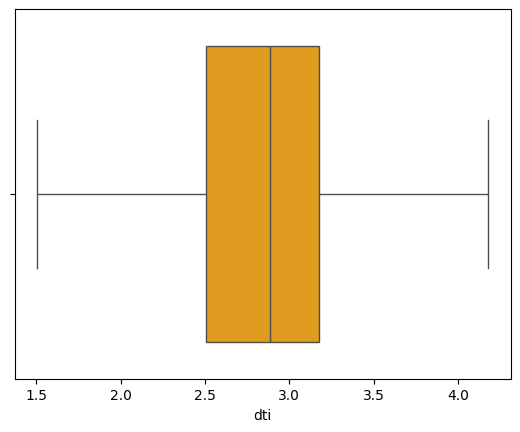

In [211]:
q1=df['dti'].quantile(0.25)
q3=df['dti'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['dti']=np.clip(df['dti'],ll,ul)
print(sns.boxplot(data=df,x='dti',color='orange'))

#### mort_acc outlier handling

In [212]:
df['mort_acc'].skew()

np.float64(1.7088323314695741)

Axes(0.125,0.11;0.775x0.77)


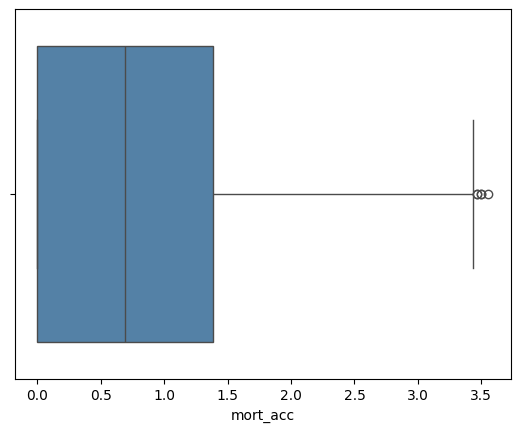

In [213]:
df['mort_acc']=np.log1p(df['mort_acc'])
print(sns.boxplot(data=df,x='mort_acc',color='steelblue'))

In [214]:
df['mort_acc'].skew()

np.float64(0.4543572415152091)

Axes(0.125,0.11;0.775x0.77)


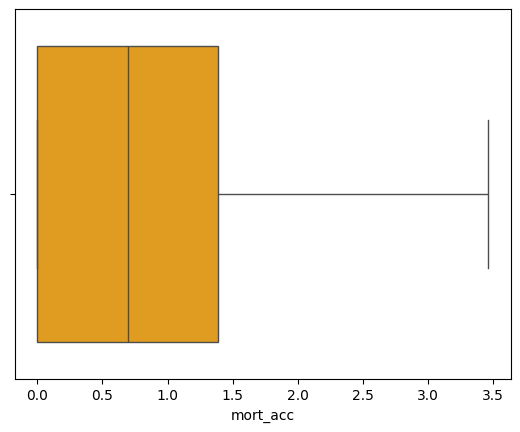

In [215]:
q1=df['mort_acc'].quantile(0.25)
q3=df['mort_acc'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['mort_acc']=np.clip(df['mort_acc'],ll,ul)
print(sns.boxplot(data=df,x='mort_acc',color='orange'))

#### Instalment

In [216]:
df['installment'].skew()

np.float64(0.9836031783991422)

Axes(0.125,0.11;0.775x0.77)


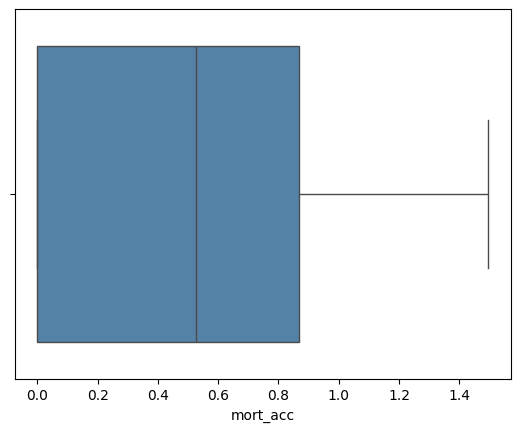

In [217]:
df['mort_acc']=np.log1p(df['mort_acc'])
print(sns.boxplot(data=df,x='mort_acc',color='steelblue'))

#### int_rate

In [218]:
df['int_rate'].skew()

np.float64(0.41940907435852504)

Axes(0.125,0.11;0.775x0.77)


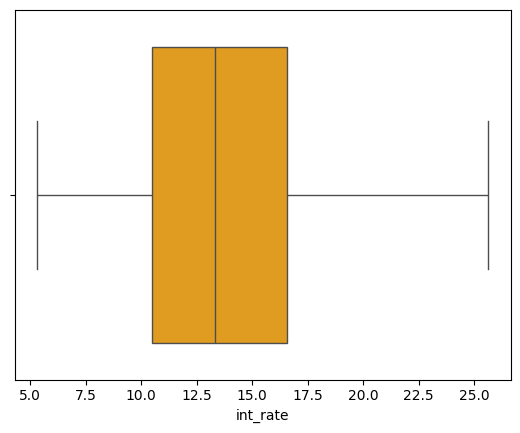

In [219]:
q1=df['int_rate'].quantile(0.25)
q3=df['int_rate'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['int_rate']=np.clip(df['int_rate'],ll,ul)
print(sns.boxplot(data=df,x='int_rate',color='orange'))

#### loan_amount

In [220]:
df['loan_amnt'].skew()

np.float64(0.7768918877738565)

Axes(0.125,0.11;0.775x0.77)


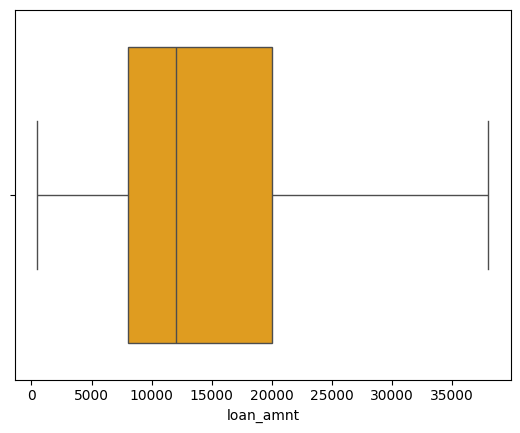

In [221]:
q1=df['loan_amnt'].quantile(0.25)
q3=df['loan_amnt'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['loan_amnt']=np.clip(df['loan_amnt'],ll,ul)
print(sns.boxplot(data=df,x='loan_amnt',color='orange'))

## **Encoding of categorical data**

In [222]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'loan_status'],
      dtype='object')

In [223]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['term']=le.fit_transform(df['term'])

In [224]:
df['loan_status']=le.fit_transform(df['loan_status'])

In [225]:
df['loan_status'].value_counts()

loan_status
1    317696
0     77523
Name: count, dtype: int64

In [226]:
df['emp_length']=df['emp_length'].map({'10+ years':'10','2 years':"2",'3 years':"3",'< 1 year':"0",'5 years':'5','1 year':'1',
                                       '4 years':'4','6 years':"6",'7 years':'7','8 years':'8','9 years':'9'})


In [227]:
df['emp_length']=df['emp_length'].astype(int)

In [228]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [229]:
df=df[~df['home_ownership'].isin(['OTHER','NONE','ANY'])]

In [230]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
Name: count, dtype: int64

In [231]:
df['verification_status'].value_counts()

verification_status
Verified           139387
Source Verified    131287
Not Verified       124403
Name: count, dtype: int64

In [232]:
df=pd.get_dummies(df,columns=['home_ownership','verification_status'],drop_first=True,dtype=int)

In [233]:
df['grade'].value_counts()

grade
B    115765
C    105738
A     64031
D     63342
E     31423
F     11735
G      3043
Name: count, dtype: int64

In [234]:
df['grade']=df['grade'].map({'A':'7','B':'6','C':'5','D':'4','E':'3','F':'2','G':'1'})


In [235]:
df['grade']=df['grade'].astype(int)

In [236]:
df['grade'].value_counts()

grade
6    115765
5    105738
7     64031
4     63342
3     31423
2     11735
1      3043
Name: count, dtype: int64

In [237]:
x=df['purpose'].value_counts(normalize=True)
x.head()

purpose
debt_consolidation    0.592588
credit_card           0.209777
home_improvement      0.060619
other                 0.053273
major_purchase        0.022153
Name: proportion, dtype: float64

In [238]:
y=x[x<0.01].index
df['purpose']=df['purpose'].replace(y,'other')

In [239]:
df['purpose'].value_counts()

purpose
debt_consolidation    234118
credit_card            82878
other                  30891
home_improvement       23949
major_purchase          8752
small_business          5649
car                     4668
medical                 4172
Name: count, dtype: int64

In [240]:
df=pd.get_dummies(df,columns=['purpose'],drop_first=True,dtype=int)

In [241]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,pub_rec,revol_bal,...,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business
0,10000.0,0,11.44,329.48,6,10,11.669938,3.304686,0.0,10.501500,...,1,0,0,0,0,0,0,0,1,0
1,8000.0,0,11.99,265.68,6,4,11.082158,3.137666,0.0,9.910066,...,0,0,0,0,1,0,0,0,0,0
2,15600.0,0,10.49,506.97,6,0,10.670303,2.623944,0.0,9.391661,...,1,1,0,1,0,0,0,0,0,0
3,7200.0,0,6.49,220.65,7,6,10.896758,1.507543,0.0,8.607582,...,1,0,0,1,0,0,0,0,0,0
4,24375.0,1,17.27,609.33,5,9,10.915107,3.553918,0.0,10.109892,...,0,0,1,1,0,0,0,0,0,0


## **Feature engineering**

In [242]:
dfr=df.copy()

In [243]:
dfl=df.copy()

In [244]:
dfl.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'annual_inc', 'dti', 'pub_rec', 'revol_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_medical', 'purpose_other',
       'purpose_small_business'],
      dtype='object')

In [245]:
df['loan_status'].value_counts()

loan_status
1    317577
0     77500
Name: count, dtype: int64

In [246]:
dfl['loan_to_income_ratio'] = dfl['loan_amnt'] / dfl['annual_inc']*dfl['installment']/dfl['int_rate']

In [247]:
####

In [248]:
dfl['dti/revol_bal'] = dfl['dti'] / dfl['revol_bal'].mul(dfl['grade'])

In [249]:
###

In [250]:
dfl=dfl.drop(['pub_rec','loan_amnt','annual_inc','int_rate','installment','grade','dti','revol_bal'],axis=1)

In [251]:
dfl=dfl.drop(['purpose_debt_consolidation'],axis=1)

In [252]:
dfl.head(2)

,term,emp_length,mort_acc,pub_rec_bankruptcies,loan_status,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,loan_to_income_ratio,dti/revol_bal
0,0,10,0.000000,0.0,1,0,1,0,0,0,0,0,0,1,0,24679.39409,0.052448
1,0,4,0.869742,0.0,1,0,0,0,0,0,0,0,0,0,0,15995.77665,0.052769


## **Logistic regression model**

In [253]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = dfl.columns
vif_data["VIF"] = [variance_inflation_factor(dfl.values, i) for i in range(dfl.shape[1])]

print(vif_data)

                                Feature       VIF
0                                  term  1.612215
1                            emp_length  3.586925
2                              mort_acc  2.989176
3                  pub_rec_bankruptcies  1.157889
4                           loan_status  3.801282
5                    home_ownership_OWN  1.220669
6                   home_ownership_RENT  2.258779
7   verification_status_Source Verified  2.104936
8          verification_status_Verified  2.352707
9                   purpose_credit_card  1.323633
10             purpose_home_improvement  1.112941
11               purpose_major_purchase  1.033545
12                      purpose_medical  1.019505
13                        purpose_other  1.148132
14               purpose_small_business  1.027268
15                 loan_to_income_ratio  2.065199
16                        dti/revol_bal  4.438922


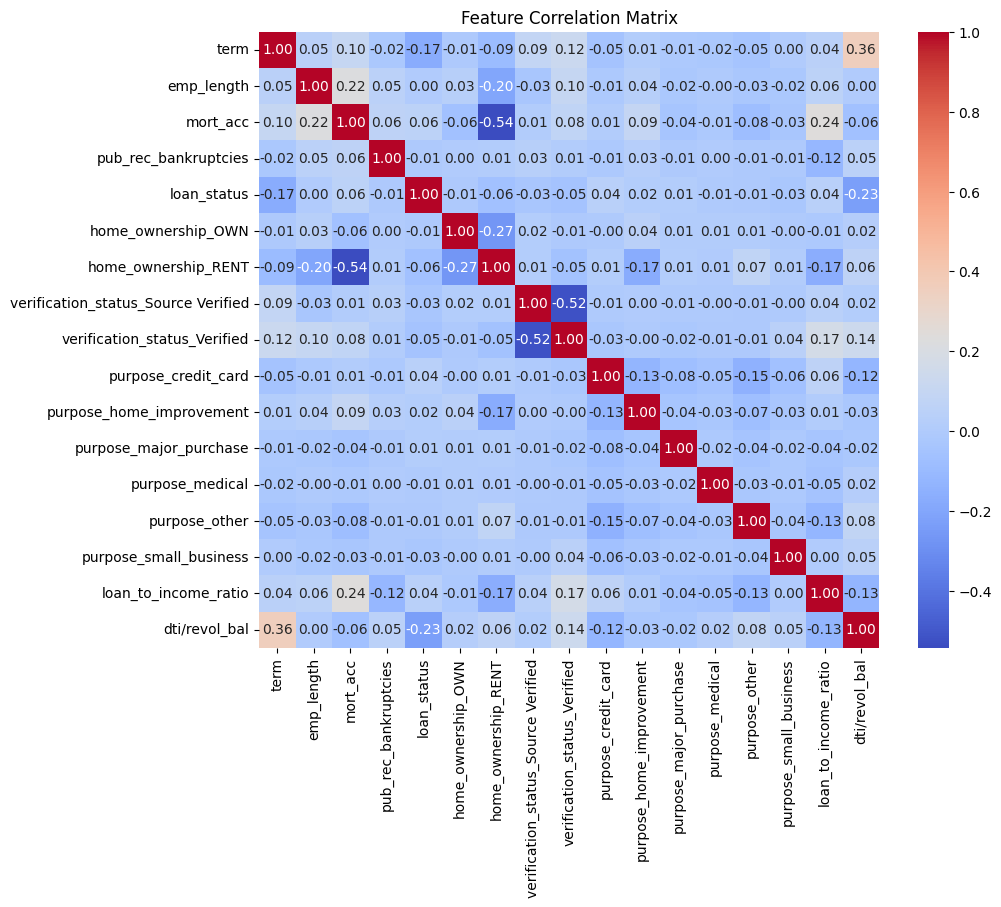

In [254]:
corr = dfl.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [255]:
x=dfl.drop('loan_status',axis=1)
y=dfl['loan_status']

In [256]:
y.value_counts()

loan_status
1    317577
0     77500
Name: count, dtype: int64

In [257]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report,roc_auc_score,auc,roc_curve

In [258]:
X_tr, X_test, y_tr, y_test = train_test_split(x, y, test_size=0.2, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=45)
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [259]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=45)
X_tr_res, y_tr_res = SMOTE(random_state=42).fit_resample(X_train_scl, y_train)

In [260]:
y_tr_res.value_counts()

loan_status
1    203100
0    203100
Name: count, dtype: int64

In [261]:
log_reg = LogisticRegression(max_iter=1000,random_state=42)

In [262]:

from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['elasticnet'],
    'C': [0.01],  
    'solver': ['saga'],             
    'l1_ratio': [1] }

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1)


In [263]:
grid_search.fit(X_tr_res, y_tr_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01], 'l1_ratio': [1], 'penalty': ['elasticnet'], 'solver': ['saga']}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'elasticnet'


In [264]:
best_model = grid_search.best_estimator_
print(" Best Parameters:")
print(grid_search.best_params_)
print(f"Best ROC-AUC (CV mean): {grid_search.best_score_:.4f}")

 Best Parameters:
{'C': 0.01, 'l1_ratio': 1, 'penalty': 'elasticnet', 'solver': 'saga'}
Best ROC-AUC (CV mean): 0.6903


In [265]:
y_pred = best_model.predict(X_test_scl)
y_pred_proba = best_model.predict_proba(X_test_scl)[:, 1]

In [266]:
print("Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Set Evaluation:
Accuracy: 0.6811
ROC-AUC:  0.6890

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.56      0.41     15437
           1       0.87      0.71      0.78     63579

    accuracy                           0.68     79016
   macro avg       0.60      0.64      0.60     79016
weighted avg       0.76      0.68      0.71     79016


Confusion Matrix:
[[ 8715  6722]
 [18477 45102]]


In [267]:
if best_model.penalty in ['l1', 'l2', 'elasticnet']:
    feature_importance = pd.DataFrame({
        'Feature': x.columns,
        'Coefficient': best_model.coef_[0],
        'AbsImportance': np.abs(best_model.coef_[0])
    }).sort_values(by='AbsImportance', ascending=False)

    print("Top 10 Important Features:")
    print(feature_importance.head(10))

Top 10 Important Features:
                                Feature  Coefficient  AbsImportance
15                        dti/revol_bal    -0.481239       0.481239
0                                  term    -0.246983       0.246983
5                   home_ownership_RENT    -0.131462       0.131462
6   verification_status_Source Verified    -0.120949       0.120949
7          verification_status_Verified    -0.118951       0.118951
2                              mort_acc     0.082486       0.082486
14                 loan_to_income_ratio     0.076980       0.076980
4                    home_ownership_OWN    -0.054852       0.054852
13               purpose_small_business    -0.040035       0.040035
8                   purpose_credit_card     0.027997       0.027997


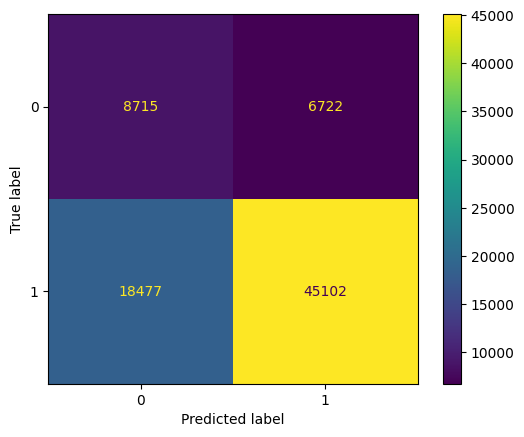

In [268]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

## **LightGBM**

In [269]:
import lightgbm as lgb

In [270]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [271]:
import numpy as np
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

In [272]:
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'learning_rate': 0.04,
    'num_leaves': 35,
    'max_depth': -1,
    'scale_pos_weight': scale_pos_weight,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.75,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

In [273]:
callbacks = [
    lgb.early_stopping(stopping_rounds=100),
    lgb.log_evaluation(period=100)
]

In [274]:
model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, test_data],
    callbacks=callbacks
)

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.70599	valid_1's auc: 0.700256
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.70599	valid_1's auc: 0.700256


In [275]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.63).astype(int)

In [276]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Confusion Matrix:
 [[13150  2287]
 [38829 24750]]

Classification Report:
               precision    recall  f1-score   support

           0      0.253     0.852     0.390     15437
           1      0.915     0.389     0.546     63579

    accuracy                          0.480     79016
   macro avg      0.584     0.621     0.468     79016
weighted avg      0.786     0.480     0.516     79016

ROC-AUC Score: 0.7002562046219567


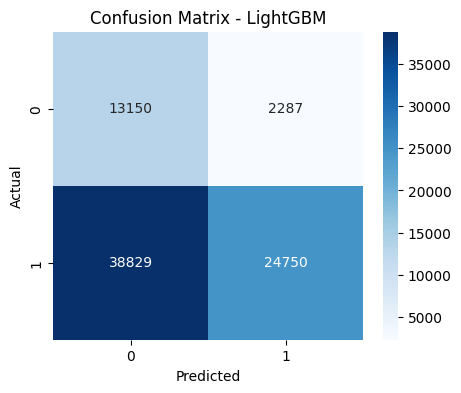

In [277]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

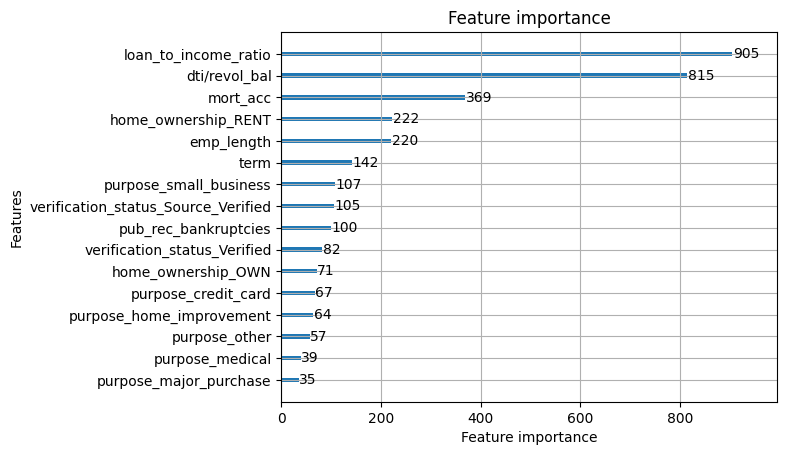

In [278]:
lgb.plot_importance(model, max_num_features=20)


##  **Conclusion & Actionable Credit Risk Recommendations**

This project developed a data-driven Credit Risk Prediction system for the LoanTap dataset, combining rigorous EDA, advanced feature engineering, imbalance handling, and multiple machine-learning models. LightGBM emerged as the best-performing model, achieving a **ROC-AUC of ~0.70** and significantly improved recall for identifying high-risk borrowers. This makes the model suitable for real-world credit screening, where the primary objective is to minimize default risk rather than maximize overall accuracy.

#### **Key Findings**

- LightGBM shows a strong ability to distinguish between default and non-default customers.

- Recall for the “defaulter” class improved substantially, meaning more risky borrowers are detected.

- Precision decreases at higher recall, but this trade-off is acceptable in credit lending where missing a defaulter is extremely costly.

- Engineered features — such as loan-to-income ratio, DTI to revolving balance  and mortgage account — contributed significantly to model performance.

### **Threshold-Based Performance (Important Business Insight)**

- Using a decision threshold of **0.63**, the LightGBM model achieves:

- **Recall: 85.2%** → The model successfully catches most of the potential defaulters.

- **Precision: 25.3%** → More false positives occur, meaning some safe customers may be flagged for review.

#### **Business Interpretation:**
This trade-off is acceptable in credit risk.
The financial loss from approving a defaulter is far greater than the operational cost of manually reviewing some additional safe customers.
Therefore, a threshold around 0.60–0.65 is suitable for identifying high-risk applicants.

---
 ## **Actionable Recommendations for the Credit Risk Team**
 
#### **1. Implement a Risk-Based Threshold**

- Use threshold ≈ **0.60–0.65** to maximize defaulter detection (high recall).

- Customers above this score should go through enhanced manual verification

#### **2. Apply a Tiered Risk Categorization**

- High Risk (≥ 0.6)**: Strict verification, reduce loan amount, higher interest rate, or rejection.

- Medium Risk (0.45 – 0.55): Additional documents required, verify bank statement ,income etc.

- Low Risk (< 0.35): Auto-approve through standard process.

#### **3. Strengthen Underwriting Policies**

- Limit loan amounts for customers with high loan-to-income ratio.

- Carefully evaluate borrowers with high DTI relative to their revolving balance.

- Offer shorter tenures or adjusted interest rates for borderline profiles.

#### **4. Monitor Model Drift**

- Evaluate model performance monthly.

- Retrain the model quarterly with updated customer loan data.


### **Overall Summary**

The final LightGBM model is a practical, scalable tool for improving credit risk decision-making. By focusing on recall and incorporating threshold-based decisions, LoanTap can reduce financial losses, strengthen its loan portfolio, and improve the consistency of credit approvals.